In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('Measurement')
for c in columns:
        print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

In [10]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [11]:
year_ago=dt.date(2017, 11, 3)-dt.timedelta(days=365)
data_precipitation=session.query(Measurement.date,Measurement.prcp).\
filter(Measurement.date>=year_ago).\
order_by(Measurement.date).all()
data_precipitation

[('2016-11-03', 0.0),
 ('2016-11-03', 0.0),
 ('2016-11-03', 0.0),
 ('2016-11-03', 0.0),
 ('2016-11-03', 0.0),
 ('2016-11-03', 0.02),
 ('2016-11-04', 0.0),
 ('2016-11-04', 0.0),
 ('2016-11-04', 0.0),
 ('2016-11-04', None),
 ('2016-11-04', 0.0),
 ('2016-11-04', 0.0),
 ('2016-11-04', 0.06),
 ('2016-11-05', 0.0),
 ('2016-11-05', 0.02),
 ('2016-11-05', 0.0),
 ('2016-11-05', 0.02),
 ('2016-11-05', 0.03),
 ('2016-11-05', 0.38),
 ('2016-11-06', 0.0),
 ('2016-11-06', 0.02),
 ('2016-11-06', 0.0),
 ('2016-11-06', 0.0),
 ('2016-11-06', 0.01),
 ('2016-11-06', 0.05),
 ('2016-11-07', 0.0),
 ('2016-11-07', 0.0),
 ('2016-11-07', 0.13),
 ('2016-11-07', None),
 ('2016-11-07', 0.0),
 ('2016-11-07', 0.0),
 ('2016-11-07', 0.05),
 ('2016-11-08', 0.07),
 ('2016-11-08', 0.14),
 ('2016-11-08', 0.02),
 ('2016-11-08', 0.15),
 ('2016-11-08', 0.21),
 ('2016-11-08', 0.53),
 ('2016-11-09', 0.0),
 ('2016-11-09', 0.08),
 ('2016-11-09', 0.17),
 ('2016-11-09', 0.0),
 ('2016-11-09', 0.0),
 ('2016-11-09', 0.11),
 ('2016-11

In [12]:
precipitation = pd.DataFrame(data_precipitation)
precipitation.set_index('date').head()

,prcp
date,
2016-11-03,0.0
2016-11-03,0.0
2016-11-03,0.0
2016-11-03,0.0
2016-11-03,0.0


Text(0,0.5,'Point')

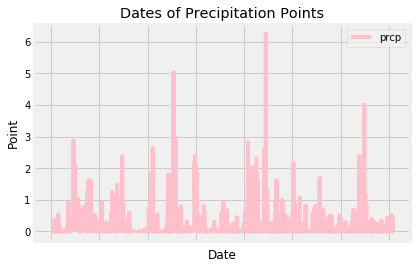

In [13]:
precipitation.plot('date', 'prcp', color="pink")
plt.title("Dates of Precipitation Points")
plt.xlabel("Date")
plt.ylabel("Point")

In [14]:
precipitation.describe(percentiles=None, include=None, exclude=None )

,prcp
count,1604.000000
mean,0.165867
std,0.433988
min,0.000000
25%,0.000000
50%,0.010000
75%,0.120000
max,6.250000


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [17]:
# Design a query to show how many stations are available in this dataset?
available_stations=session.query(func.count(Station.station)).all()
available_stations


[(9)]

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
year_ago=dt.date(2017, 11, 3)-dt.timedelta(365)
data_temperature=session.query(Station.station,func.count(Measurement.tobs)).\
filter(Measurement.date>=year_ago).\
group_by(Station.station).\
order_by(func.count(Measurement.tobs).desc()).all()
data_temperature

[('USC00511918', 1771),
 ('USC00513117', 1771),
 ('USC00514830', 1771),
 ('USC00516128', 1771),
 ('USC00517948', 1771),
 ('USC00518838', 1771),
 ('USC00519281', 1771),
 ('USC00519397', 1771),
 ('USC00519523', 1771)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
print(session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Station.station==Measurement.station).\
    filter(Station.station=="USC00519281").all())


[(54.0, 85.0, 71.66378066378067)]


In [20]:
# Choose the station with the highest number of temperature observations.

list_stations2_temp=session.query(Station.station,func.count(Measurement.tobs)).\
    filter(Station.station==Measurement.station).\
    group_by(Station.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
list_stations2_temp[0][0]


'USC00519281'

![precipitation](Images/station-histogram.png)

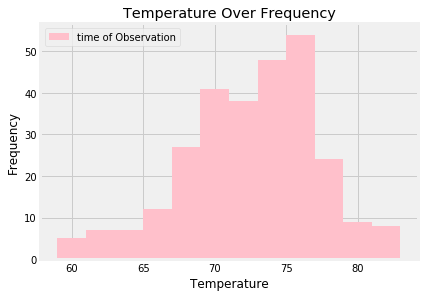

In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_stations=list_stations2_temp[0][0]
temperature_records=session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station==query_stations).\
    filter(Measurement.date>=year_ago).\
    order_by(Measurement.tobs.desc()).all()
frequency= [temperature_record[0] for temperature_record in temperature_records]
temperature = [temperature_record[1] for temperature_record in temperature_records]
df = pd.DataFrame(temperature_records, columns=['temperature', 'Frequency'])
df.plot.hist(color="pink",bins=12)
plt.xlabel("Temperature")
plt.legend(["time of Observation"])
plt.tight_layout()

plt.title("Temperature Over Frequency")
plt.ylabel("Frequency")
plt.show()
                                


In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

vacation_temperature = (calc_temps('2017-08-04', '2017-08-10'))
print(vacation_temperature)

[(71.0, 79.70370370370371, 83.0)]


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

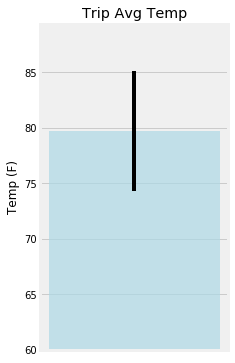

In [27]:
lower = vacation_temperature[0][1] - vacation_temperature[0][0]
upper = vacation_temperature[0][2] - vacation_temperature[0][1]

plt.figure(figsize=(3,6))
plt.bar(0, vacation_temperature[0][1], yerr=[upper-lower], color='lightblue', alpha=0.7)
plt.title('Trip Avg Temp')
plt.xticks([])
plt.ylabel('Temp (F)')
plt.ylim(60)
plt.show()

In [32]:
def collect_rainfall(start_date, end_date):
        return session.query(Measurement.station,
                            Measurement.prcp.label('rainfall'),
                            Station.latitude,
                            Station.longitude,
                            Station.elevation).\
                                group_by(Measurement.station).\
                                join(Station, Measurement.station == Station.station).\
                                filter(Measurement.date >= start_date).\
                                filter(Measurement.date <= end_date).\
                                order_by('rainfall DESC').all()

collect_rainfall('2017-08-04', '2017-08-10')

/anaconda3/lib/python3.6/site-packages/sqlalchemy/sql/compiler.py:643: SAWarning: Can't resolve label reference 'rainfall DESC'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


[('USC00516128', 0.07, 21.3331, -157.8025, 152.4),
 ('USC00514830', 0.0, 21.5213, -157.8374, 7.0),
 ('USC00519281', 0.0, 21.45167, -157.84888999999998, 32.9),
 ('USC00519397', 0.0, 21.2716, -157.8168, 3.0),
 ('USC00519523', 0.0, 21.33556, -157.71139, 19.5)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
